<a href="https://colab.research.google.com/github/musicjae/cs231n/blob/master/assignment1/two_layer_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'Colab Notebooks/cs231n/assignments/assignment1'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# this downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
!bash get_datasets.sh
%cd /content

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/cs231n/assignments/assignment1/cs231n/datasets
--2020-07-21 07:28:54--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.

# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))


우리는 신경망의 인스턴스를 보여주기 위해 `cs231n/classifiers/neural_net.py`에서 `TwoLayerNet`를 사용할 것이다. 이 신경망의 매개변수는 그 인스턴스의 변수 `self.params`에 저장된다. 여기서 중요한 것은 string 매개변수 이름과 값이 넘파이 배열이란 것이다. 아래에서, 우리는 toy 자료와 수행을 발전시키기 위해 사용할 toy 모델을 초기화한다.

In [10]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

## 1. Foward Pass<br>
<h5> 두 개의 층이 완전히 연결된 신경망. 그 신경망의 입력 차원은 N, 은닉층 차원은 H이고, 이것은 C 개의 클래스로 분류를 한다. 우리는 가중치 행렬, 소프트맥스 손실 함수, L2 정규화를 가지고 이 신경망을 훈련시킨다. 이 신경망은 먼저 완전히 연결된 층에 ReLU 비선형성을 사용한다. [*fully connected layer = 완전히 연결된 층.] 

<br>

즉, 이 신경망은 다음의 구조를 갖는다.
    
<br>

입력 -- 완전히 연결된 층 -- ReLU -- 완전히 연결된 층 -- 소프트맥스<Br>  
    두 번째 완전히 연결된 층의 아웃풋은 "각 클래스의 스코어"이다.

In [11]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

if 1e-7 > np.sum(np.abs(scores - correct_scores)):
    print('옳게 프로그래밍 함.')

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08
옳게 프로그래밍 함.


In [12]:
#My studying, not contained.

from __future__ import print_function
from builtins import range
from builtins import object
import numpy as np
import matplotlib.pyplot as plt
from past.builtins import xrange
from cs231n.gradient_check import eval_numerical_gradient

class TwoLayerNet(object):
   
    def __init__(self, input_size, hidden_size, output_size, std=1e-4): # 
        """
       
        모델을 초기화하라. 가중치는 작은 랜덤 값으로 초기화되고, 편향은 0으로 초기화된다. 가중치와 편향은 self.params 변항에 저장된다. 
        이는 다음의 key를 가진 dictionary이다.

        W1: First layer weights; has shape (D, H)
        b1: First layer biases; has shape (H,)
        
        W2: Second layer weights; has shape (H, C)
        b2: Second layer biases; has shape (C,)

        Inputs:
        
        - input_size: The dimension D of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        """
        
        #인풋 크기: (인풋 자료의 차원 수) D, 은닉 크기: (뉴런 수) H, 아웃풋 크기: (클래스 개수) C
        
        self.params = {} # dic 형태인 변항에 가중치, 편향 저장.
        self.params['W1'] = std * np.random.randn(input_size, hidden_size) # 가중치 랜덤값으로 초기화
        self.params['b1'] = np.zeros(hidden_size) # 편향 항은 0으로 초기화
        
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
 
    def loss(self, X, y=None, reg=0.0):
        
        """
        손실, 그래디언트 계산하라 for a two layer fully connected neural network.

        Inputs:
        
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
          an integer in the range 0 <= y[i] < C. This parameter is optional; if it
          is not passed then we only return scores, and if it is passed then we
          instead return the loss and gradients.
        - reg: Regularization strength.

        Returns:
        
        If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
        the score for class c on input X[i].

        If y is not None, instead return a tuple of:
        
        - loss: 트레이닝 샘플의 batch의 손실 (data 손실 + 정규화 손실)
        - grads: <매개변수 이름>이 <손실 함수에 대한 매개변수의 그래디언트>를 사상map하는 dictionary. 
                 이 dic은 self.params와 동일한 keys를 가진다.
        """
        
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape

        # Compute the forward pass
        s = None # The s is a score

        # TODO: the forward pass를 수행하라, 인풋의 클래스 스코어를 계산하라
        # 스코어 변항에 그 결과를 저장하라. 그것은 shape (N, C)인 배열이어야 한다.  
        
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        f = np.dot(X, W1) + b1
        h= np.maximum(0, f) # ReLU 함수화
        
        s = np.dot(h, W2) + b2 # 위 그림 참고
        
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # If the targets are not given then jump out, we're done
        if y is None:
            return s # (N, C)

        # Compute the loss
        
        loss = None # 초기화
        
        #############################################################################
        # TODO: forward pass를 완성하고, the loss를 계산하라. 이것은 W1, W2에 대한 data 손실과 
        # 정규화를 포함해야 한다. 그리고 그 결과를 loss의 변항에 저장하라. 이는 스칼라여야 한다.       
        # 소프트맥스 손실 분류기를 사용하라           
        #                   
        #############################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        s -= np.max(s)
        exp_s = np.exp(s)
        sum_s = np.sum(exp_s, axis= -1, keepdims= True) #softmax 때와 같이, 벡터화 해주기
        out = exp_s/sum_s
        
        loss = -np.sum(np.log(out[np.arange(N), y]))
        
        loss /= N
        loss += 0.5 *reg * (np.sum(W1**2) + np.sum(W2**2)) #가중치가 2 개니까 각각 정규화한 뒤 더한다
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # gradiet 구하기
        
        grads = {}
        
        """
        To do: 가중치와 bias를 미분하는 Backward pass 를 계산하라. 
               그 결과를 grad 딕셔너리 안에 저장하라. 가령, grad['W1']은 W1의
               그래디언트를 저장해야 하고, 이 둘의 크기는 같아야 한다.
        """
        s = 0 # The s is a score
        f = np.dot(X, W1) + b1
        h = np.maximum(0, f) # maximum(): Element-wise maximum of array elements.
        
        s = np.dot(h, W2) + b2 # 위 그림 참고
        
        s -= np.max(s)
        exp_s = np.exp(s)
        sum_s = np.sum(exp_s, axis= -1, keepdims= True) #softmax 때와 같이, 벡터화 해주기
        out = exp_s/sum_s# output을 구하기 위해, 위와 동일한 작업 수행
        
        #Backpropagation
        
        ds = out
        ds[np.arange(N),y] -= 1 # 소프트맥스에 대한 backpropagation
        
        dh = np.dot(ds, W2.T) # s = W2*h + b2 이니까, dh에 대한 backpropagation
        
        dh[h <= 0] = 0 # ReLU에 대한 backpropagation
        df = dh
        
        # 매개변수의 그래디언트 계산하기
        
        grads['W2'] = np.dot(h.T, ds) 
        grads['W1'] = np.dot(X.T, df) 
        grads['b2'] = np.sum(ds, axis=0)
        grads['b1'] = np.sum(df, axis=0)
        

          # 매개변수의 그래디언트 계산하기
        
        dW2 = np.dot(h.T, ds) # [HxN] * [NxC] = [HxC]
        dW1 = np.dot(X.T, df) # [DxN] * [NxH] = [DxH]
        db2 = np.sum(ds, axis=0)
        db1 = np.sum(df, axis=0) # db1 = np.ones((1, num_train)).dot(hidden)
        
        dW2 /= N
        dW1 /= N
        db2 /= N
        db1 /= N 
        

        # 정규화
      
        dW1 += reg*W1
        dW2 += reg*W2
        
        grads = {'W1':dW1, 'W2' : dW2, 'b1':db1, 'b2': db2}
        
        return loss, grads
""""
우리는 신경망의 인스턴스를 보여주기 위해 바로 위에서 작성한 `TwoLayerNet`를 사용할 것이다. 
이 신경망의 매개변수는 그 인스턴스의 변수 `self.params`에 저장된다. 여기서 중요한 것은 string 매개변수 names와 values가 둘다 배열이란 것이다.
아래에서, 우리는 toy의 자료와 implementaion을 발전시키기 위해 사용할 <toy 모델>을 초기화한다.

"""



input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size) # X(5,4)
    y = np.array([0, 1, 2, 2, 1]) # y(5,)
    return X, y 

net = init_toy_model()
X, y = init_toy_data()

"""
Forward pass: 스코어 계산하기
`cs231n/classifiers/neural_net.py` 파일의 TwoLayerNet.loss 메서드를 보라. 
이 함수는 SVM, Softmax 예제에서 작성했던 손실 함수와 매우 비슷하다: 이 함수는 data와 가중치를 취하고, 클래스 스코어, 손실, 그래디언트를 계산한다.
모든 입력의 스코어를 계산하기 위해 가중치와 편향을 사용하는 forward pass의 첫 번째 부분을 실행해보자.
"""

scores = net.loss(X)
print(' 1. Your scores:')
print(scores)
print()
print(' 2. correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print(' 3. 나의 스코어와 정답 스코어 간 차이: ')
print('%e, %f' % (np.sum(np.abs(scores - correct_scores)),np.sum(np.abs(scores - correct_scores))))

# In the same function, implement the second part that computes the data and regularization loss.
print('\n')

loss = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print(' 4. 나의 손실과 정답 손실 간 차이: ')

print('%f' % np.sum(np.abs(loss[0] - correct_loss)))

#그래디언트 체킹

loss, grads = net.loss(X, y, reg=0.05)

#loss, grads = net.loss(X, y, reg=0.05)
# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('4. %s max relative error: %e' % ( rel_error(param_grad_num, grads[param_name])))
    
   

 1. Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

 2. correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

 3. 나의 스코어와 정답 스코어 간 차이: 
3.680272e-08, 0.000000


 4. 나의 손실과 정답 손실 간 차이: 
0.018965


TypeError: ignored

# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [5]:

loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

if 1e-12 > np.sum(np.abs(loss - correct_loss)):
    print('옳게 프로그래밍 함')

Difference between your loss and correct loss:
1.7985612998927536e-13
옳게 프로그래밍 함


## 2. Backward pass<br>
##### 남은 함수들을 작성해보라. 이 함수는 변수 'W1', 'b1', W2', 그리고 'b2'에 대한 손실의 그래디언트를 계산할 것이다. 네가 forward pass를 올바르게 작성했다면, 너는 수치적 그래디언트를 사용하여 backward pass를 디버그할 수 있다.

In [6]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.
loss, grads = net.loss(X, y, reg=0.05)


# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))
    print('=%f' % ( rel_error(param_grad_num, grads[param_name])))
    if (rel_error(param_grad_num, grads[param_name])) < 1e-8:
        print('\n >>>> correct')

W1 max relative error: 1.000000e+00
=1.000000
W2 max relative error: 3.440708e-09
=0.000000

 >>>> correct
b1 max relative error: 1.000000e+00
=1.000000
b2 max relative error: 4.447625e-11
=0.000000

 >>>> correct


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  1.0681514378278365


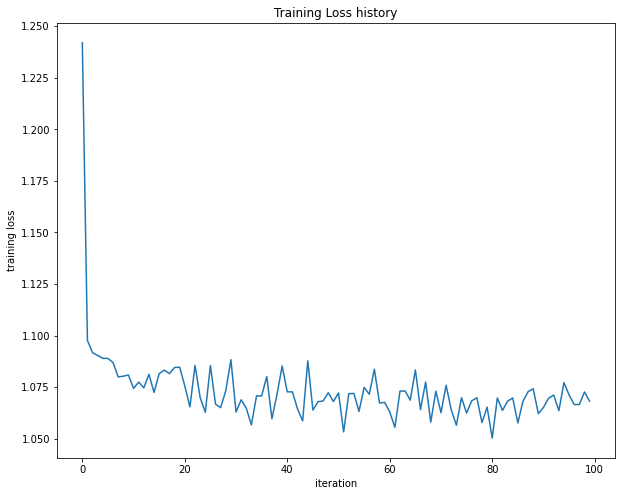

In [7]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [9]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/content/drive/My Drive/Colab Notebooks/cs231n/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [ ]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

In [ ]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

In [ ]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [ ]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

pass

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


In [ ]:
# Print your validation accuracy: this should be above 48%
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

In [ ]:
# Visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [ ]:
# Print your test accuracy: this should be above 48%
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$

